# Recurrent Neural Network

# Timeseries for Google Stock Price Prediction

## Part 1 - Data Preprocessing

### Importing the libraries

In [9]:
pip install keras


  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install tensorflow



  Using cached tensorflow-2.13.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp310-cp310-win_amd64.whl (276.5 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ---------------------------------------- 4.2/4.2 MB 3.1 MB/s eta 0:00:00
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached protobuf-4.23.4-cp310-abi3-win_amd64.whl (422 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
     ---------------------------------------- 24.4/24.4 MB 3.6 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
     ---

In [12]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [13]:
dataset_train = pd.read_csv("C:\\Users\\Lenovo\\Documents\\PythonIpynb\\Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [15]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [18]:
regressor = Sequential()

### Adding the first Long short term Memory (LSTM) layer and some Dropout regularisation

In [19]:
regressor.add(LSTM(units = 20, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [20]:
regressor.add(LSTM(units = 40, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [21]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a Fourth LSTM layer and some Dropout regularisation

In [22]:
regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fifth LSTM layer and some Dropout regularisation

In [23]:
regressor.add(LSTM(units = 80))
regressor.add(Dropout(0.2))

### Adding the output layer

In [24]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [25]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [26]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 108ms/step - loss: 0.0370
Epoch 2/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0042
Epoch 7/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0043
Epoch 8/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 5s 118ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0043
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [27]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [28]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


### Visualising the results

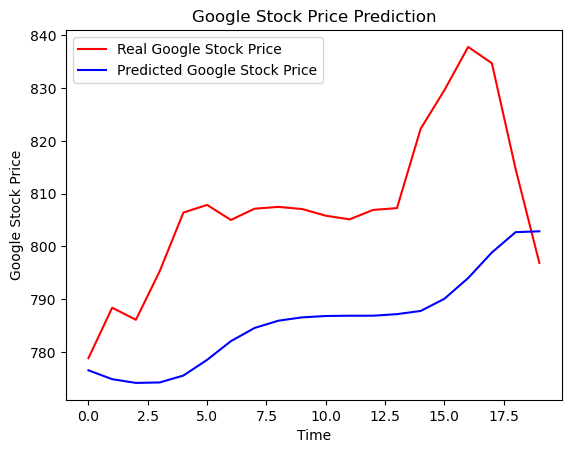

In [29]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# Timeseries for Weather Forecasting

In [70]:
df = pd.read_csv("C:\\Users\\Lenovo\\Documents\\PythonIpynb\\jena_climate_2009_2016.csv")


Visualization:

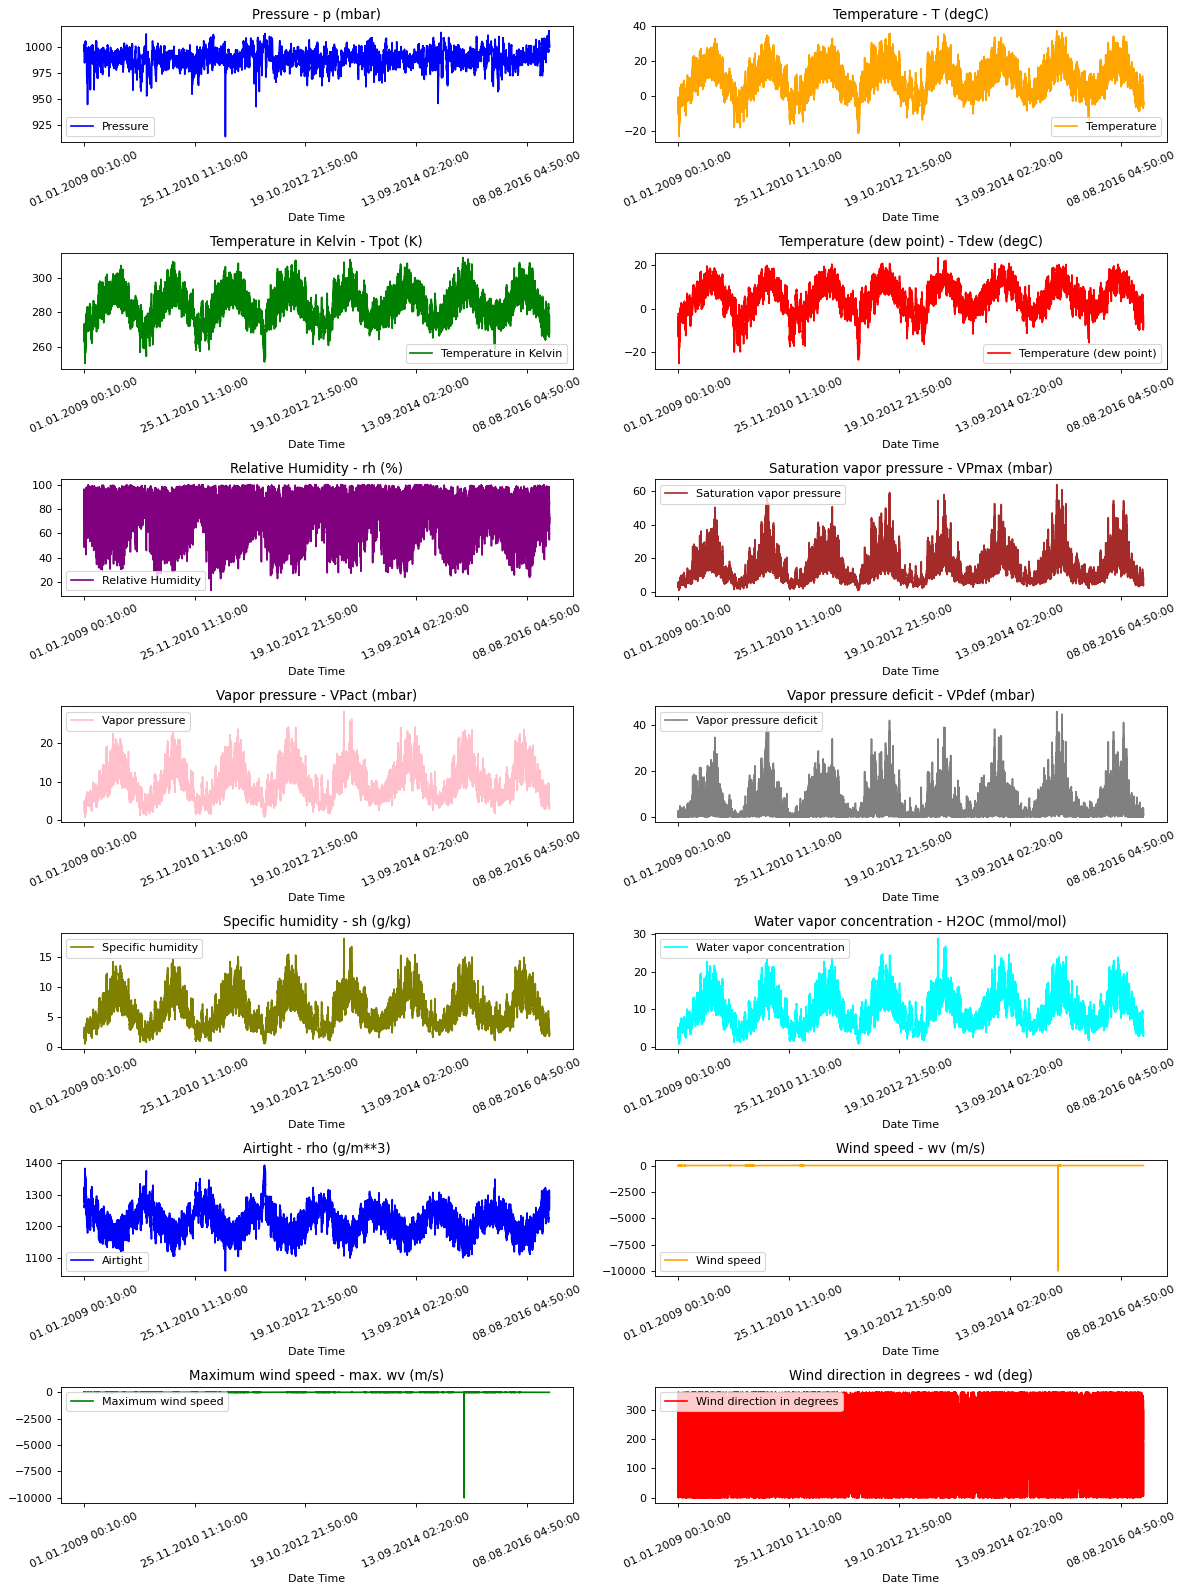

In [71]:
titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = "Date Time"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df)


### Heatmap

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3412\3897922630.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(data.corr())


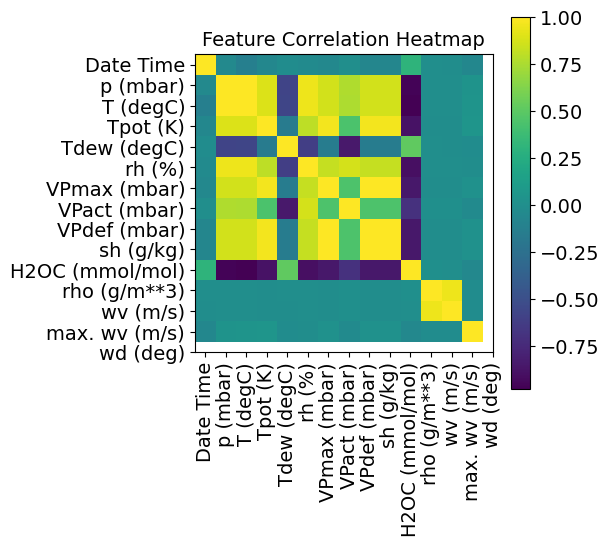

In [72]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(df)

### Data Preprocessing


In [73]:
split_fraction = 0.715
train_split = int(split_fraction * int(df.shape[0]))
step = 6

past = 720
future = 72
learning_rate = 0.001
batch_size = 256
epochs = 10


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

In [74]:
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1, 5, 7, 8, 10, 11]]),
)
selected_features = [feature_keys[i] for i in [0, 1, 5, 7, 8, 10, 11]]
features = df[selected_features]
features.index = df[date_time_key]
features.head()

features = normalize(features.values, train_split)
features = pd.DataFrame(features)
features.head()

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

The selected parameters are: Pressure, Temperature, Saturation vapor pressure, Vapor pressure deficit, Specific humidity, Airtight, Wind speed


### Training the dataset


In [75]:
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(7)]].values
y_train = features.iloc[start:end][[1]]

sequence_length = int(past / step)

In [76]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

### Validation dataset

In [77]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(7)]].values
y_val = features.iloc[label_start:][[1]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 120, 7)
Target shape: (256, 1)


### TRAINING

In [78]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 lstm_19 (LSTM)              (None, 32)                5120      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5153 (20.13 KB)
Trainable params: 5153 (20.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
1172/1172 [==============================] - ETA: 0s - loss: 0.1828
Epoch 1: val_loss improved from inf to 0.15175, saving model to model_checkpoint.h5
1172/1172 [==============================] - 146s 123ms/step - loss: 0.1828 - val_loss: 0.1517
Epoch 2/10
1172/1172 [==============================] - ETA: 0s - loss: 0.1267
Epoch 2: val_loss improved from 0.15175 to 0.13929, saving model to model_checkpoint.h5
1172/1172 [==============================] - 142s 121ms/step - loss: 0.1267 - val_loss: 0.1393
Epoch 3/10
1172/1172 [==============================] - ETA: 0s - loss: 0.1151
Epoch 3: val_loss did not improve from 0.13929
1172/1172 [==============================] - 151s 129ms/step - loss: 0.1151 - val_loss: 0.1458
Epoch 4/10
1172/1172 [==============================] - ETA: 0s - loss: 0.1104
Epoch 4: val_loss did not improve from 0.13929
1172/1172 [==============================] - 178s 152ms/step - loss: 0.1104 - val_loss: 0.1450
Epoch 5/10
1172/1172 [================

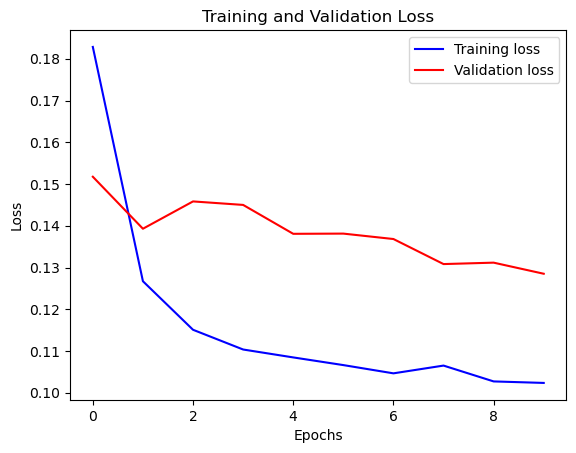

In [80]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

### PREDICTION 

8/8 [==============================] - 1s 22ms/step


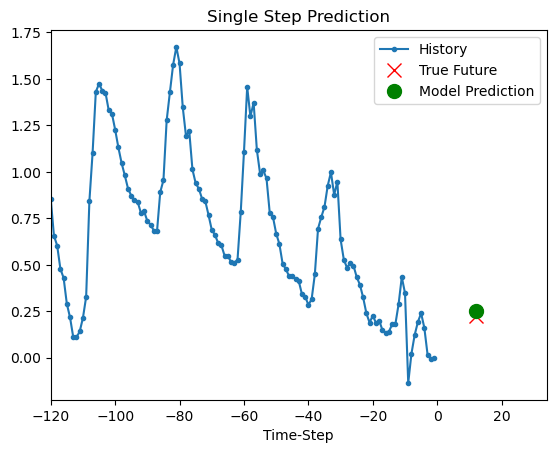

8/8 [==============================] - 0s 24ms/step


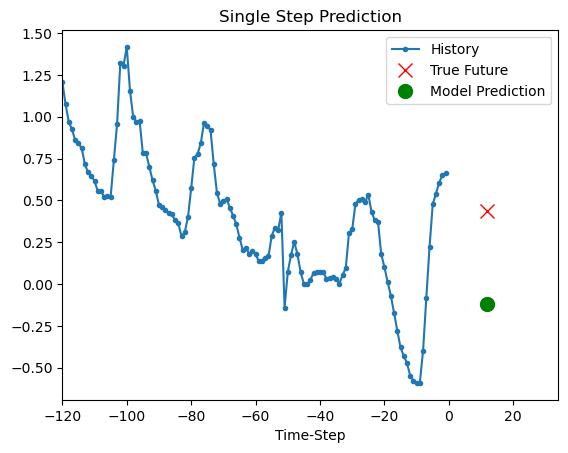

8/8 [==============================] - 0s 25ms/step


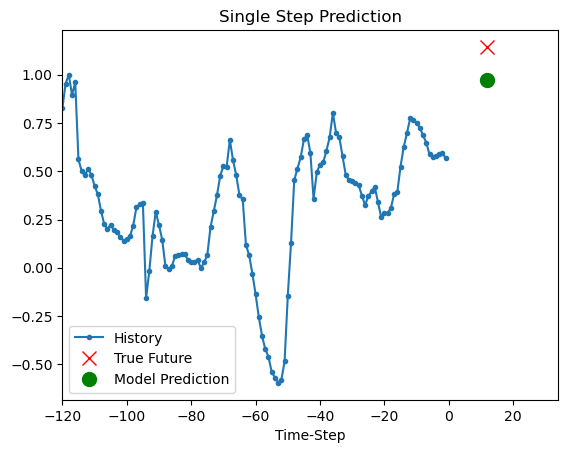

8/8 [==============================] - 0s 23ms/step


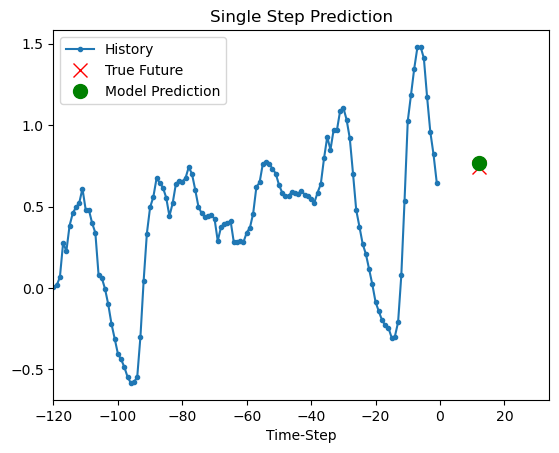

8/8 [==============================] - 0s 24ms/step


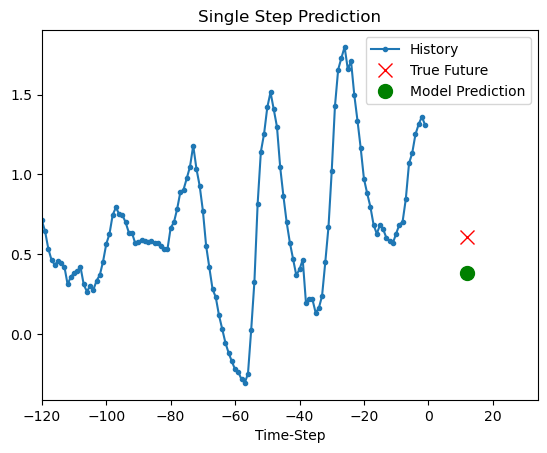

In [81]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )